In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'

Файл с парами <логин>-<время-на-микротаск> был предварительно сформирован через консоль PostgreSQL, через
```sql
> \copy (SELECT ...) to './output.csv' with CSV;
```

In [2]:
import pandas as pd
df = pd.read_csv('output.csv', names=['login', 'time'])

,login,time
0,7,80.600000
1,7,80.600000
2,7,62.250000
3,7,31.125000
4,7,19.000000
...,...,...
701821,7,61.333333
701822,7,24.750000
701823,7,48.600000
701824,7,48.600000


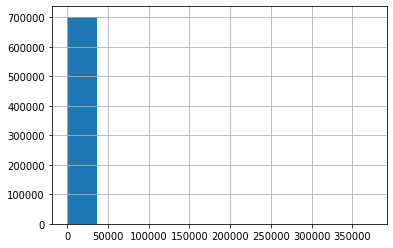

In [3]:
df['time'].hist()

In [4]:
max_time_per_microtask = df['time'].quantile(.95)

473.0

In [5]:
min_time_per_microtask = df['time'].quantile(.05)

11.0

Фильтруем датафрейм, отсекаем выбросы по 95-му персентилю

In [6]:
df = df[df['time'].between(min_time_per_microtask, max_time_per_microtask)]

,login,time
0,7,80.600000
1,7,80.600000
2,7,62.250000
3,7,31.125000
4,7,19.000000
...,...,...
701821,7,61.333333
701822,7,24.750000
701823,7,48.600000
701824,7,48.600000


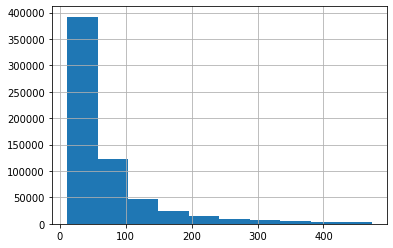

In [7]:
df['time'].hist()

Группировка по логину, аналогична SQL

In [8]:
grouped = df.groupby('login', as_index=False)
grouped.describe()

login                                                   time  \
      count   mean  std    min    25%    50%    75%    max   count   
0     785.0    0.0  0.0    0.0    0.0    0.0    0.0    0.0   785.0   
1     966.0    1.0  0.0    1.0    1.0    1.0    1.0    1.0   966.0   
2    1110.0    2.0  0.0    2.0    2.0    2.0    2.0    2.0  1110.0   
3    4238.0    3.0  0.0    3.0    3.0    3.0    3.0    3.0  4238.0   
4      44.0    4.0  0.0    4.0    4.0    4.0    4.0    4.0    44.0   
..      ...    ...  ...    ...    ...    ...    ...    ...     ...   
759   267.0  762.0  0.0  762.0  762.0  762.0  762.0  762.0   267.0   
760   335.0  763.0  0.0  763.0  763.0  763.0  763.0  763.0   335.0   
761   342.0  764.0  0.0  764.0  764.0  764.0  764.0  764.0   342.0   
762   307.0  765.0  0.0  765.0  765.0  765.0  765.0  765.0   307.0   
763    66.0  766.0  0.0  766.0  766.0  766.0  766.0  766.0    66.0   

                                                                           \
           mean         std        min        25%         50%         75%   
0     71.306493   88.525180  11.000000  22.000000   37.000000   71.000000   
1     75.114373   63.676442  11.222222  35.000000   56.000000   90.000000   
2     77.005031   85.338575  11.000000  23.791667   42.603896   92.778571   
3    102.629541   81.454286  11.000000  47.130555   77.000000  130.000000   
4     36.002438   38.878120  11.000000  14.821428   26.000000   43.000000   
..          ...         ...        ...        ...         ...         ...   
759  115.448478  103.449313  11.214286  42.000000   84.666667  153.500000   
760   61.109445   55.789498  11.250000  34.750000   48.000000   66.300000   
761   84.651956   75.466237  12.466667  34.000000   57.000000  104.068182   
762  141.228127  103.565610  12.666667  61.750000  117.500000  193.500000   
763  135.414646  120.412373  18.000000  42.250000   86.800000  223.958333   

                 
            max  
0    471.000000  
1    450.500000  
2    473.000000  
3    473.000000  
4    245.000000  
..          ...  
759  459.000000  
760  441.000000  
761  426.230769  
762  470.000000  
763  466.000000  

[764 rows x 16 columns]

Фильтрация внутри групп (по логину), отсекам выбросы по правилу трех сигм

In [9]:
def threeSigmaRule(val):
    return abs(val - val.mean()) < 3 * val.std()

grouped = grouped.apply(lambda x: x[threeSigmaRule(x['time'])].dropna()).groupby('login', as_index=False)
grouped.describe()

login                                                   time  \
      count   mean  std    min    25%    50%    75%    max   count   
0     755.0    0.0  0.0    0.0    0.0    0.0    0.0    0.0   755.0   
1     945.0    1.0  0.0    1.0    1.0    1.0    1.0    1.0   945.0   
2    1077.0    2.0  0.0    2.0    2.0    2.0    2.0    2.0  1077.0   
3    4139.0    3.0  0.0    3.0    3.0    3.0    3.0    3.0  4139.0   
4      43.0    4.0  0.0    4.0    4.0    4.0    4.0    4.0    43.0   
..      ...    ...  ...    ...    ...    ...    ...    ...     ...   
755   261.0  762.0  0.0  762.0  762.0  762.0  762.0  762.0   261.0   
756   326.0  763.0  0.0  763.0  763.0  763.0  763.0  763.0   326.0   
757   333.0  764.0  0.0  764.0  764.0  764.0  764.0  764.0   333.0   
758   306.0  765.0  0.0  765.0  765.0  765.0  765.0  765.0   306.0   
759    66.0  766.0  0.0  766.0  766.0  766.0  766.0  766.0    66.0   

                                                                           \
           mean         std        min        25%         50%         75%   
0     57.811387   57.510638  11.000000  21.000000   36.000000   65.000000   
1     69.084639   49.158441  11.222222  35.000000   55.000000   87.500000   
2     67.295413   65.440510  11.000000  23.285714   41.428571   84.250000   
3     95.485080   67.640815  11.000000  46.708333   75.555556  124.000000   
4     31.142029   21.984333  11.000000  14.642857   25.500000   40.833333   
..          ...         ...        ...        ...         ...         ...   
755  107.650359   90.728747  11.214286  41.875000   81.222222  150.750000   
756   53.658479   31.295496  11.250000  34.055555   47.000000   62.937500   
757   77.056832   60.107450  12.466667  34.000000   55.000000   97.000000   
758  140.153709  102.007096  12.666667  61.625000  115.000000  188.250000   
759  135.414646  120.412373  18.000000  42.250000   86.800000  223.958333   

            
       max  
0    334.0  
1    257.5  
2    327.0  
3    345.0  
4    115.0  
..     ...  
755  425.0  
756  226.0  
757  310.6  
758  442.0  
759  466.0  

[760 rows x 16 columns]

Получаем математическое ожидание среднего времени на микротаск для каждого пользователя

In [10]:
mean_by_group = grouped.mean()

,login,time
0,0,57.811387
1,1,69.084639
2,2,67.295413
3,3,95.485080
4,4,31.142029
...,...,...
755,762,107.650359
756,763,53.658479
757,764,77.056832
758,765,140.153709


In [11]:
max_mean_per_group = mean_by_group['time'].quantile(.95)

147.19762266540403

In [12]:
min_mean_per_group = mean_by_group['time'].quantile(.05)

39.775677116309524

Дополнительно отсекаем выбросы уже сгруппированных значений

In [13]:
mean_by_group = mean_by_group[mean_by_group['time'].between(min_mean_per_group, max_mean_per_group)]

,login,time
0,0,57.811387
1,1,69.084639
2,2,67.295413
3,3,95.485080
5,5,59.563846
...,...,...
755,762,107.650359
756,763,53.658479
757,764,77.056832
758,765,140.153709


И получаем "среднее средних" - математическое ожидание среднего времени выполнения микротаска для каждого пользователя

In [14]:
f"Average time per microtask: {mean_by_group['time'].mean():.2f} seconds"

'Average time per microtask: 78.27 seconds'

In [15]:
f"Fair microtask pricee: N * {mean_by_group['time'].mean()/30:.2f} rubles"

'Fair microtask pricee: N * 2.61 rubles'